In [208]:
import pandas as pd
import numpy as np

In [235]:
dsets = ['income', 'compas', 'german']

for d in dsets:
    df = pd.read_csv(d + '_experiment_mean.csv')
    dp_df = pd.read_csv(d + '_experiment_mean_dp.csv')
    df['e'] = np.nan
    dp_df.rename(columns={'t':'tau'}, inplace=True)
    new_df = pd.concat([df, dp_df]).reset_index(drop=True)
    new_df.drop(['kf', 'lf'], axis=1, inplace=True)
    for p in ['k', 'u', 'f']:
        new_df[p].replace(0, np.nan, inplace=True)
    new_df.rename(columns={'m': 'micro_agg',
                           'e': 'epsilon', 
                           'nc': 'neg_corr'}, inplace=True)
    cols = new_df.columns.tolist()
    cols = cols[9:12] + [cols[0]] + cols[12:] + [cols[1], cols[5]] + cols[2:5] + cols[6:9]
    new_df = new_df[cols]
    new_df.to_csv(d + '_experiment_mean_all.csv', index=False)

In [236]:
dsets = ['income', 'compas', 'german']

perf = ['accuracy', 'auc', 'f1']
fair = ['dpr', 'eor', 'eOdds']
params = ['k', 'u', 'f', 'tau', 'neg_corr', 'micro_agg', 'epsilon']
m_perf = ['perf_name', 'perf_val']

for d in dsets:
    df = pd.read_csv(d + '_experiment_mean_all.csv')
    melt_df = pd.melt(df, id_vars=fair+params, value_vars=perf,
                      var_name='perf_name', value_name='perf_val')
    melt_df = pd.melt(melt_df, id_vars=params+m_perf, value_vars=fair,
                      var_name='fair_name', value_name='fair_val')
    melt_df.to_csv(d + '_experiment_mean_all_melt.csv', index=False)

## Plots

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('income_experiment_mean_all.csv')
melt_df = pd.read_csv('income_experiment_mean_all_melt.csv')

In [241]:
df['cluster_size'] = np.nan_to_num(df.k) + np.nan_to_num(df.u) + np.nan_to_num(df.f)
df['cluster_type'] = ['k' if e > 0 else 'uf' if u > 0 else np.nan for e, u in zip(df.k, df.u)]

melt_df['cluster_size'] = np.nan_to_num(melt_df.k) + np.nan_to_num(melt_df.u) + np.nan_to_num(melt_df.f)
melt_df['cluster_type'] = ['k' if e > 0 else 'uf' if u > 0 else np.nan for e, u in zip(melt_df.k, melt_df.u)]

In [247]:
melt_df[melt_df.cluster_type.isnull()].head()

,k,u,f,tau,neg_corr,micro_agg,epsilon,perf_name,perf_val,fair_name,fair_val,cluster_size,cluster_type
880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,accuracy,0.850434,dpr,0.178923,0.0,NaN
1761,NaN,NaN,NaN,NaN,NaN,NaN,0.01,accuracy,0.591424,dpr,0.028318,0.0,NaN
2642,NaN,NaN,NaN,NaN,NaN,NaN,0.10,accuracy,0.698444,dpr,0.047918,0.0,NaN
3523,NaN,NaN,NaN,NaN,NaN,NaN,1.00,accuracy,0.625444,dpr,0.102253,0.0,NaN
4404,NaN,NaN,NaN,NaN,NaN,NaN,10.00,accuracy,0.663461,dpr,0.080630,0.0,NaN


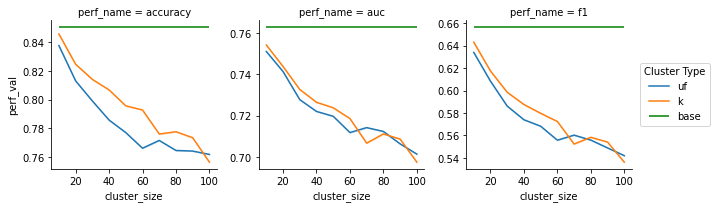

In [261]:
g = sns.FacetGrid(data=melt_df[melt_df.epsilon.isnull()
                    & (melt_df.tau == 0)
                    & (melt_df.micro_agg == 1)],
            hue="cluster_type", sharey=False,
            col='perf_name')
g.map(sns.lineplot, "cluster_size", "perf_val")

for m,ax in zip(melt_df[melt_df.cluster_type.isnull() & melt_df.epsilon.isnull()]
                .groupby('perf_name').perf_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=10, xmax=100, colors='green', label='base')
    
plt.legend(title='Cluster Type', loc='upper right', bbox_to_anchor=(1.5, 0.75))

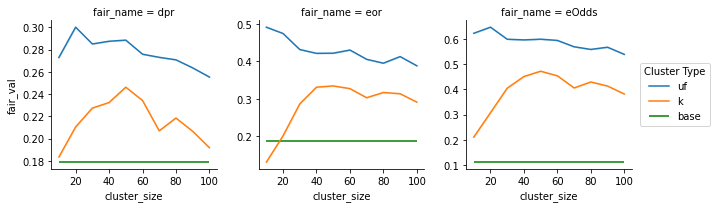

In [262]:
g = (sns.FacetGrid(data=melt_df[melt_df.epsilon.isnull()
                    & (melt_df.tau == 0)
                    & (melt_df.micro_agg == 1)],
            hue="cluster_type", sharey=False,
            col='fair_name')
     .map(sns.lineplot, "cluster_size", "fair_val")
    )

for m,ax in zip(melt_df[melt_df.cluster_type.isnull() & melt_df.epsilon.isnull()]
                .groupby('fair_name').fair_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=10, xmax=100, colors='green', label='base')
    
plt.legend(title='Cluster Type', loc='upper right', bbox_to_anchor=(1.5, 0.75))

#### DP Experiments

In [263]:
dp_df = pd.read_csv('income_DP_Experiment_all.csv')
dp_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [264]:
dsets = ['income', 'compas', 'german']

perf = ['accuracy', 'auc', 'f1']
fair = ['dpr', 'eor', 'eOdds']
params = ['e', 'fold']
m_perf = ['perf_name', 'perf_val']

for d in dsets:
    melt_df = pd.melt(dp_df, id_vars=fair+params, value_vars=perf,
                      var_name='perf_name', value_name='perf_val')
    melt_df = pd.melt(melt_df, id_vars=params+m_perf, value_vars=fair,
                      var_name='fair_name', value_name='fair_val')
    melt_df.rename(columns={'e': 'epsilon'}, inplace=True)
    melt_df.to_csv(d + '_experiment_DP_melt.csv', index=False)

In [265]:
melt_df = pd.read_csv('income_experiment_DP_melt.csv')
melt_df.head()

df = pd.read_csv('income_DP_Experiment_all.csv')
df.rename(columns={'e':'epsilon'}, inplace=True)
df.epsilon.replace({np.nan:0}, inplace=True)

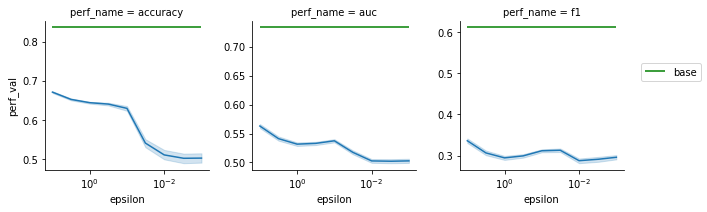

In [269]:
g = (sns.FacetGrid(data=melt_df, sharey=False, col='perf_name')
     .map(sns.lineplot, "epsilon", "perf_val")
     .set(xscale = 'log')
    )

for m,ax in zip(melt_df[melt_df.epsilon.isnull()]
                .groupby('perf_name').perf_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=0.001, xmax=10, colors='green', label='base')

plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.75))

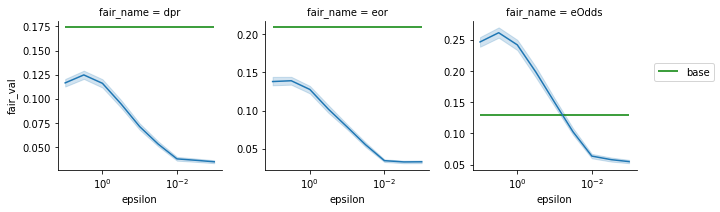

In [271]:
g = (sns.FacetGrid(data=melt_df, sharey=False, col='fair_name', col_wrap=3)
     .map(sns.lineplot, "epsilon", "fair_val")
     .set(xscale = 'log')
    )

for m,ax in zip(melt_df[melt_df.epsilon.isnull()]
                .groupby('fair_name').fair_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=0.001, xmax=10, colors='green', label='base')

plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.75))

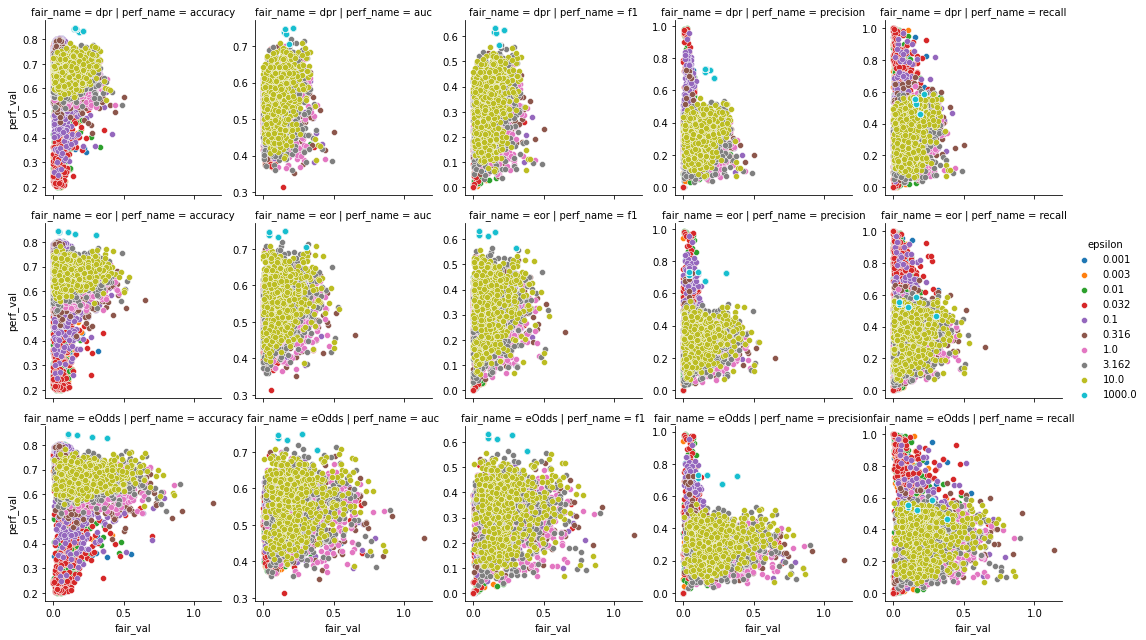

In [181]:
g = (sns.FacetGrid(data=melt_df, sharey=False, col='perf_name', row='fair_name', hue='epsilon')
     .map(sns.scatterplot, "fair_val", "perf_val")
     .add_legend()
    )

In [180]:
melt_df.epsilon.replace({np.nan:1000}, inplace=True)

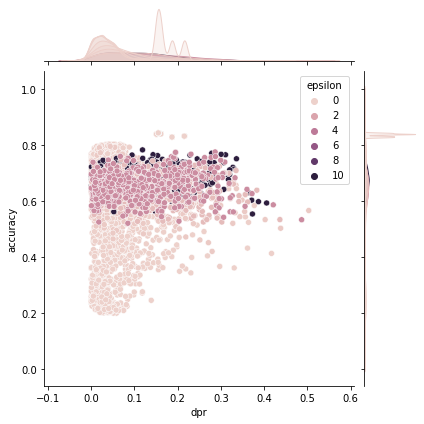

In [186]:
sns.jointplot(data=df, x="dpr", y="accuracy", hue="epsilon")

In [15]:
df = pd.read_csv('income_experiment_mean_all.csv')
df['method'] = ['dp' + str(e) if e > 0 else 'uf' if u > 0 else 'k' for e, u in zip(df.epsilon, df.u)]

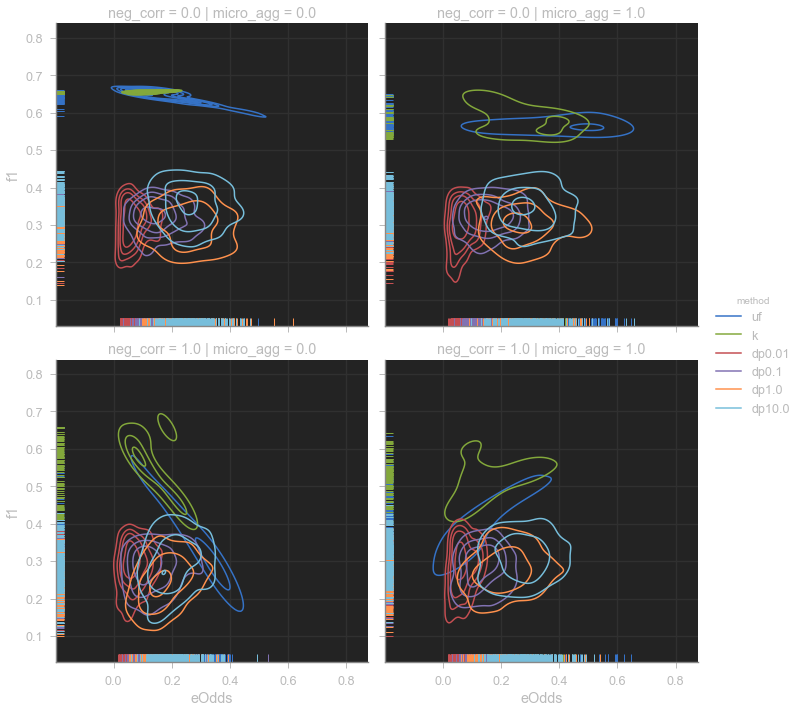

In [20]:
g = sns.displot(data=df, x="eOdds", y="f1", kind="kde", hue="method", col="micro_agg", row="neg_corr", rug= True)

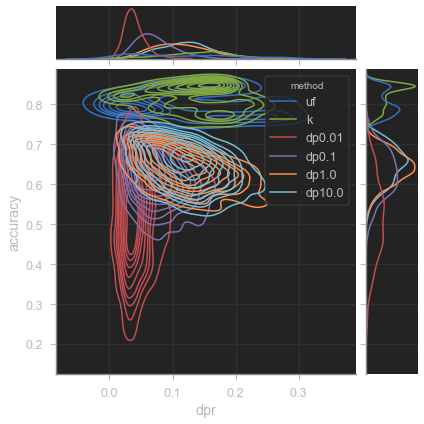

In [4]:
sns.jointplot(data=df, x="dpr", y="accuracy", hue="method", kind="kde")

<AxesSubplot:xlabel='dpr', ylabel='accuracy'>

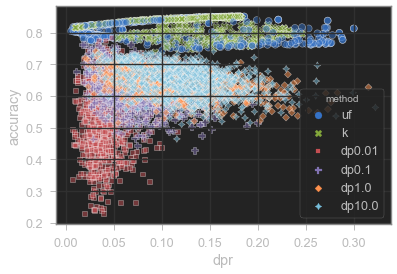

In [21]:
sns.scatterplot(data=df, x="dpr", y="accuracy", hue="method", style="method", alpha=0.5)

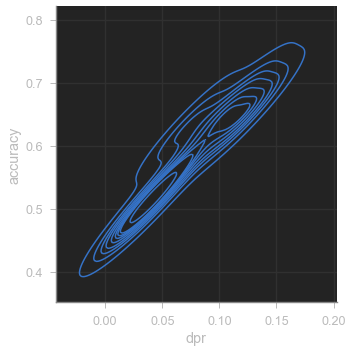

In [10]:
dp_df = pd.read_csv('income_DP_Experiment_all.csv')
dp_df.drop(['Unnamed: 0'], axis=1, inplace=True)

avg = dp_df.groupby('e').mean()
sns.displot(data=avg, x="dpr", y="accuracy", kind="kde")


<AxesSubplot:xlabel='e', ylabel='precision'>

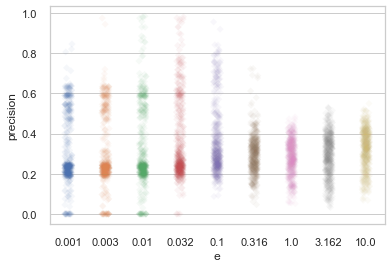

In [68]:
sns.stripplot(x="e", y="precision", data=dp_df, marker="D",
                   edgecolor="gray", alpha=.05)

<AxesSubplot:xlabel='e', ylabel='accuracy'>

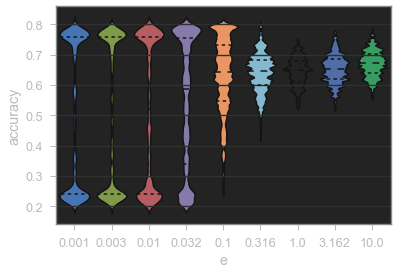

In [40]:
sns.violinplot(x="e", y="accuracy", data=dp_df, bw=0.05, split=True,
                    scale="count", inner="quartile")

<AxesSubplot:xlabel='e', ylabel='dpr'>

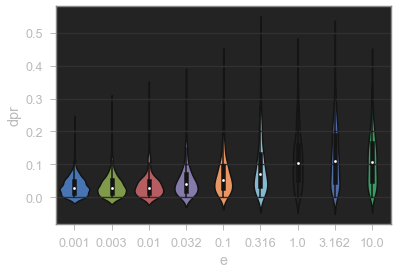

In [42]:
sns.violinplot(x="e", y="dpr", data=dp_df)

<AxesSubplot:xlabel='e', ylabel='accuracy'>

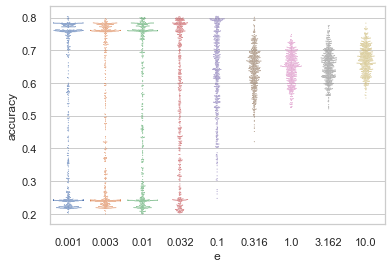

In [57]:
sns.set_theme(style="whitegrid")
sns.swarmplot(x="e", y="accuracy", data=dp_df, size=0.9)